<h1> Used cars database <br></h1>
<h2>Over 370,000 used cars scraped from Ebay</h2>
<b>
Over 370000 used cars scraped with Scrapy from Ebay<br>
So our dataset includes:
</b><br><ul>
    <li>dateCrawled : when this ad was first crawled, all field-values are taken from this date</li>
    <li>name : "name" of the car</li>
    <li>seller : private or dealer</li>
    <li>offerType</li>
    <li>price : the price on the ad to sell the car</li>
    <li>abtest</li>
    <li>vehicleType</li>
    <li>yearOfRegistration : at which year the car was first registered</li>
    <li>gearbox</li>
    <li>powerPS : power of the car in PS</li>
    <li>model</li>
    <li>kilometer : how many kilometers the car has driven</li>
    <li>monthOfRegistration : at which month the car was first registered</li>
    <li>fuelType</li>
    <li>brand</li>
    <li>notRepairedDamage : if the car has a damage which is not repaired yet</li>
    <li>dateCreated : the date for which the ad at ebay was created</li>
    <li>nrOfPictures : number of pictures in the ad (unfortunately this field contains everywhere a 0(bug in crawler!) ) </li>
    <li>postalCode</li>
    <li>lastSeenOnline : when the crawler saw this ad last online</li>
   </ul>

<b> Importing</b>

Importing required packages

In [60]:
import pandas as pd
import numpy as np
import matplotlib as plt

import datetime

importing dataset

In [2]:
data = pd.read_csv("autos.csv", encoding = "ISO-8859-1")
data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            371528 non-null object
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen              

In [4]:
data.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [5]:
data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


The "dateCrawled" column is an unnecesary column and the data has no relation with the same, so we drop the column

In [6]:
data = data.drop(["dateCrawled"], axis = 1)

In [7]:
data["seller"].value_counts()

privat        371525
gewerblich         3
Name: seller, dtype: int64

Since only 3 tuples corrospond to a different value in "seller" it is of no importance either and we cannot extract any useful information from the same. Hence, we drop the column as well.

In [8]:
data = data.drop(["seller"], axis = 1)

In [9]:
data["offerType"].value_counts()

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64

Again, Since only 12 tuples corrospond to a different value in "offerType" it is of no importance either and we cannot extract any useful information from the same. Hence, we drop the column as well.

In [10]:
data = data.drop(["offerType"], axis = 1)

In [11]:
data["nrOfPictures"].value_counts()

0    371528
Name: nrOfPictures, dtype: int64

Since all the tupples in the nrOfPictures" column corrosponds to zero, We can conclude that there must be a bug in the webcrawler or data collection fault. Hence, this column is of no use and we drop it as well.

In [12]:
data = data.drop(["nrOfPictures"], axis = 1)

Now we look at the dates provided to us.

There are two columns of interest. "DateCreated" and "lastSeen".<br>
<ul><li>
    We first convert both of the object type column to datetime type.
    </li><li>
    Then we use both the columns to extract "Number of days the add was active.
    </li><li>
    We also extract the year, month and day the add was created as different columns to visualize the same.
    </li></ul>

In [13]:
data['dateCreated'] = pd.to_datetime(data['dateCreated'])
data['lastSeen'] = pd.to_datetime(data['lastSeen'])
data["ActiveDays"]= data["lastSeen"] - data["dateCreated"]

In [14]:
data['yearCreated'], data['monthCreated'], data["dayCreated"] = data['dateCreated'].dt.year, data['dateCreated'].dt.month, data['dateCreated'].dt.day

In [15]:
data["ActiveDays"] = (data["lastSeen"] - data["dateCreated"]).dt.days

We can now delete "lastSeen" column since we hace extracted all the details from the same.

In [16]:
data = data.drop(["lastSeen"], axis = 1)

In [17]:

data = data.drop(["dateCreated"], axis = 1)

Since all the cars have unique names, there is no point of keeping that column

In [18]:
data = data.drop(["name"], axis = 1)

<b>Taking care of Null values</b>

In [19]:
data.isnull().sum()

price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
postalCode                 0
ActiveDays                 0
yearCreated                0
monthCreated               0
dayCreated                 0
dtype: int64


Null Values are in:
<ol><li>gearbox</li><li>model</li><li>fuelType</li><li>vehicleType</li><li>notRepairedDamage</li></ol>
<br><br>
<B>1. gearbox</B>
    

In [20]:
data["gearbox"].value_counts()

manuell      274214
automatik     77105
Name: gearbox, dtype: int64

Even though "manuell" has more frequency, it wouldn't be wise to replace all NaN values with the same.<br>
We thus use "brand" to fill null values of "gearbox"

In [21]:
data.groupby("brand")["gearbox"].value_counts()

brand           gearbox  
alfa_romeo      manuell       2064
                automatik      146
audi            manuell      20841
                automatik    10698
bmw             manuell      25323
                automatik    13442
chevrolet       manuell       1104
                automatik      634
chrysler        automatik      753
                manuell        637
citroen         manuell       4304
                automatik      604
dacia           manuell        877
                automatik        1
daewoo          manuell        475
                automatik       33
daihatsu        manuell        667
                automatik       85
fiat            manuell       8786
                automatik      231
ford            manuell      22198
                automatik     1953
honda           manuell       2393
                automatik      318
hyundai         manuell       3091
                automatik      421
jaguar          automatik      477
                manuell      

In [22]:
gearbox = data["gearbox"].unique()
brand = data["brand"].unique()
d = {}
for i in brand :
    max = 0
    for j in gearbox :
        if data[(data.gearbox == j) & (data.brand == i)].shape[0] > max:
            max = data[(data.gearbox == j) & (data.brand == i)].shape[0]
            d[i] = j;

In [23]:
for i in brand :
    data.loc[(data.brand == i) & (data.gearbox.isnull()) ,"gearbox" ] = d[i]

<b>2. model</b>

In [24]:
data.groupby("brand")["model"].value_counts()

brand       model      
alfa_romeo  156              629
            147              572
            andere           536
            159              212
            spider           209
            145               50
audi        a4             10257
            a3              6604
            a6              6023
            80              1606
            andere          1581
            tt              1325
            a5              1018
            a1               622
            a8               582
            q5               449
            100              417
            a2               373
            q7               343
            q3               240
            90               104
            200               18
bmw         3er            20567
            5er             8546
            1er             3837
            x_reihe         2307
            7er             1143
            z_reihe          890
            andere           380
            m_reihe

In [25]:
model = data["model"].unique()
brand = data["brand"].unique()
d = {}
for i in brand :
    max = 0
    for j in model :
        if data[(data.model == j) & (data.brand == i)].shape[0] > max:
            max = data[(data.model == j) & (data.brand == i)].shape[0]
            d[i] = j;
        else:
            d[i] = "golf"
for i in brand :
    data.loc[(data.brand == i) & (data.model.isnull()) ,"model" ] = d[i]

<b>3. fuel Type</b>

In [26]:
data["fuelType"].value_counts()

benzin     223857
diesel     107746
lpg          5378
cng           571
hybrid        278
andere        208
elektro       104
Name: fuelType, dtype: int64

In [27]:
data["fuelType"].fillna("benzin",inplace = True)

<b>4. vehicleType</b>

In [28]:
data["vehicleType"].value_counts()

limousine     95894
kleinwagen    80023
kombi         67564
bus           30201
cabrio        22898
coupe         19015
suv           14707
andere         3357
Name: vehicleType, dtype: int64

In [29]:
vehicleType = data["vehicleType"].unique()
fuelType = data["fuelType"].unique()
d = {}
for i in fuelType :
    max = 0
    for j in vehicleType :
        if data[(data.vehicleType == j) & (data.fuelType == i)].shape[0] > max:
            max = data[(data.vehicleType == j) & (data.fuelType == i)].shape[0]
            d[i] = j;
        else:
            d[i] = "limousine"
for i in fuelType :
    data.loc[(data.fuelType == i) & (data.vehicleType.isnull()) ,"vehicleType" ] = d[i]

<b> 5. notRepairedDamage</b>

Here, the column has 3 unique values "ja" that means yes; "nein" that means no; and NaN values.
We will assume that the default value to be "No" (The car was never damaged, repair is not required)
We will also encode the data as 0 for Yes and 1 for No ( Since it is a good thing if the car is repaired and in good condition.

In [30]:
data["notRepairedDamage"].fillna("nein",inplace = True)

In [31]:
data.isnull().sum()

price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
postalCode             0
ActiveDays             0
yearCreated            0
monthCreated           0
dayCreated             0
dtype: int64

<b> Label Encoding</b><br>
We will label encode all the categorical/string columns.
Later, We will also oneHotEncode many of the columns.

In [33]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [34]:
le.fit_transform(["ja", "nein"])
data["notRepairedDamage"] = le.transform(data["notRepairedDamage"]) 
data['vehicleType']= le.fit_transform(data['vehicleType']) 
data['gearbox']= le.fit_transform(data['gearbox']) 
data['model']= le.fit_transform(data['model']) 
data['fuelType']= le.fit_transform(data['fuelType']) 
data['brand']= le.fit_transform(data['brand']) 
data['abtest']= le.fit_transform(data['abtest']) 

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 17 columns):
price                  371528 non-null int64
abtest                 371528 non-null int32
vehicleType            371528 non-null int32
yearOfRegistration     371528 non-null int64
gearbox                371528 non-null int32
powerPS                371528 non-null int64
model                  371528 non-null int32
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               371528 non-null int32
brand                  371528 non-null int32
notRepairedDamage      371528 non-null int32
postalCode             371528 non-null int64
ActiveDays             371528 non-null int64
yearCreated            371528 non-null int64
monthCreated           371528 non-null int64
dayCreated             371528 non-null int64
dtypes: int32(7), int64(10)
memory usage: 38.3 MB


We see that all our columns are now integer type and not null.

<b>Removing Outliers</b>

In [37]:
# analysis year o registration
data["yearOfRegistration"].describe()

count    371528.000000
mean       2004.577997
std          92.866598
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: yearOfRegistration, dtype: float64

In [38]:
data[data.yearOfRegistration > 2019].shape

(114, 17)

In [39]:
data[data.yearOfRegistration < 1950].shape

(289, 17)

Since these289 registration are there before 1950 and 114 registration after 2019 (the dataset was last updated in 2019) , 
so these are outliers and should be removed for better results

In [40]:
data = data[(data.yearOfRegistration < 2019)  & (data.yearOfRegistration > 1950)]

In [41]:
# now lets look at the price
data["price"].describe()

count    3.710760e+05
mean     1.724595e+04
std      3.590063e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.950000e+03
75%      7.200000e+03
max      2.147484e+09
Name: price, dtype: float64

In [42]:
print(data[data.price < 100].shape)
print(data[data.price > 200000].shape)

(13172, 17)
(164, 17)


58 values are there above 2 lakh(dollars) and 12000 enries below 100(dollars), lets remove them
Since these are unreasonable amount of money, it is better that we delete these as well.

In [43]:
data = data[(data.price > 100) & (data.price < 200000)]

<b>Splitting Dataset</b><br>
lets seperate the output and input

In [44]:
y  = data["price"]
x =  data.drop("price",axis=1)

Let's seperate the training and testing set

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [46]:
import seaborn as sns

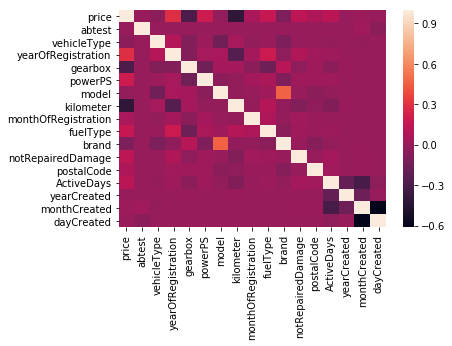

In [49]:
sns.heatmap(data.corr())

We see from the heat map that the last three columns "monthCreated". "DateCreated". "YearCreated" has 0 co-relation with the price, So we will drop these three columns when we apply classifiation to improve accuracy.

In [50]:
data = data.drop(["yearCreated", "monthCreated","dayCreated"], axis = 1)

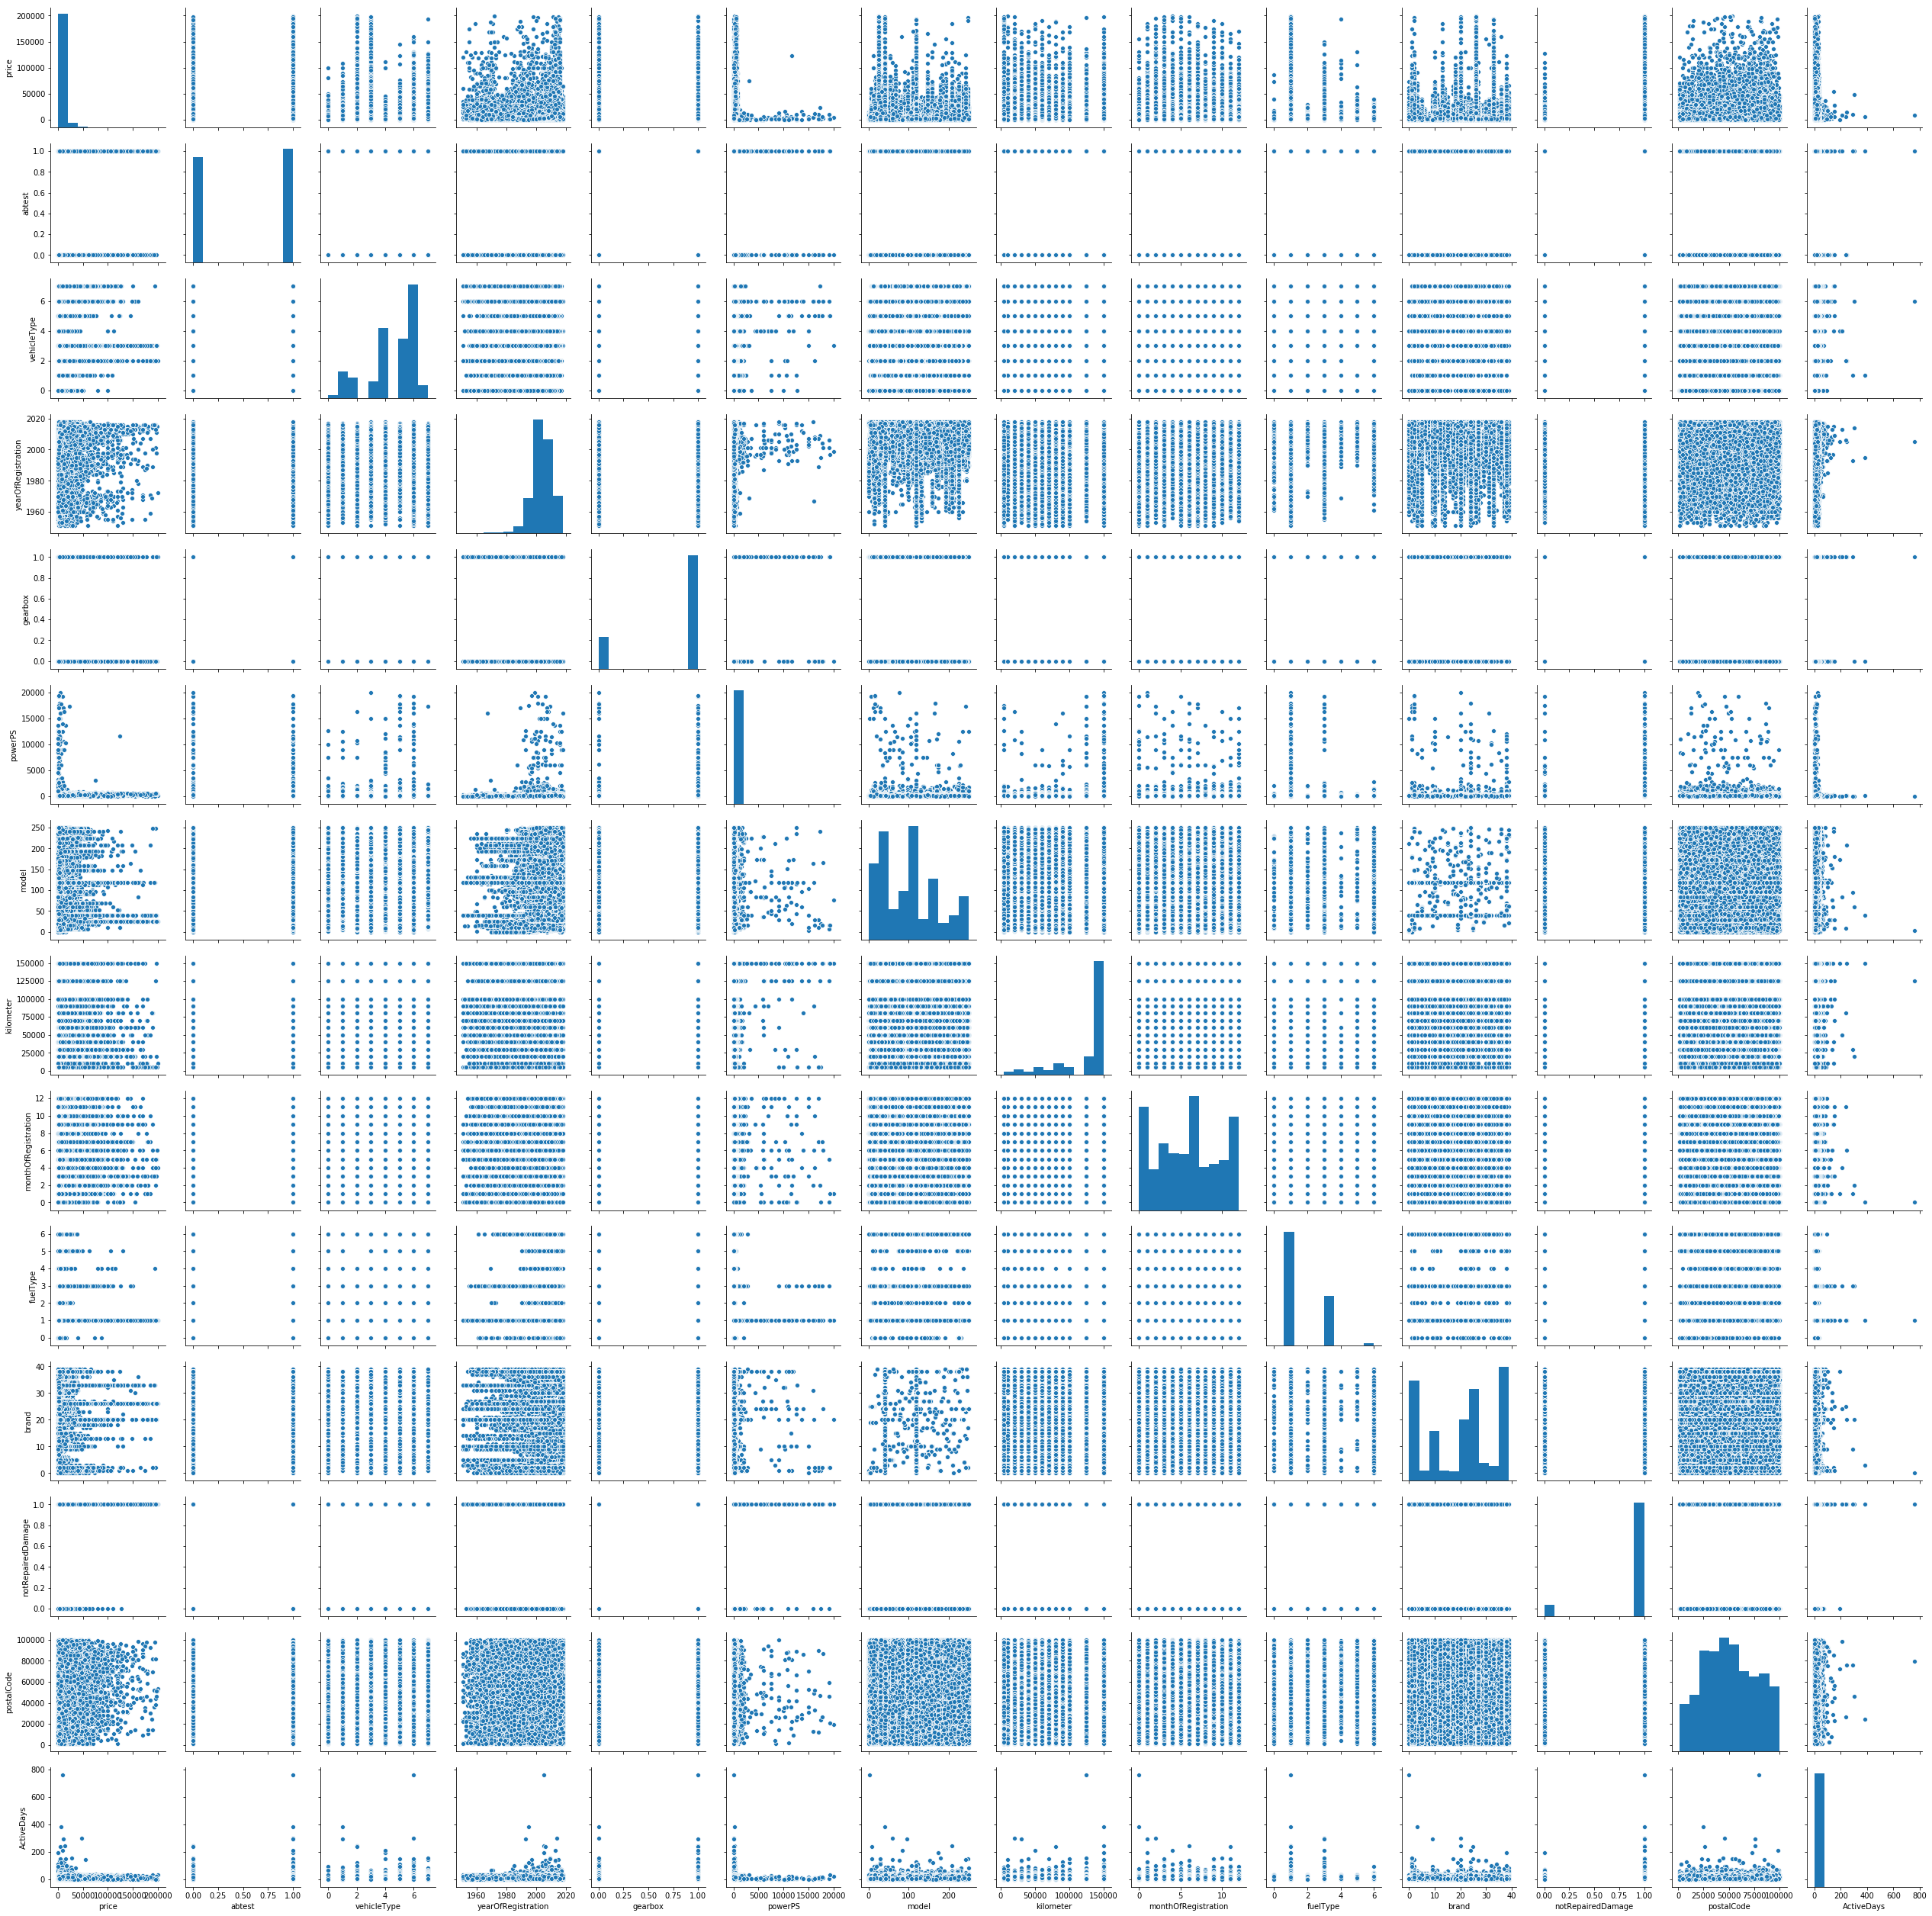

In [53]:
sns.pairplot(data)

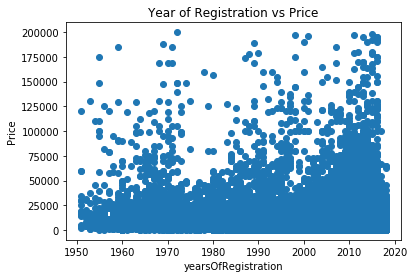

In [64]:
plt.pyplot.scatter(data["yearOfRegistration"], data["price"])
plt.pyplot.title('Year of Registration vs Price')
plt.pyplot.xlabel('yearsOfRegistration')
plt.pyplot.ylabel('Price')
plt.pyplot.show()

<b>One Hot Encoding catagorical features</b>

In [67]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [1,2,4,6,9,10]) 
data = onehotencoder.fit_transform(data).toarray() 

C:\Users\Khushi\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Khushi\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [72]:
pd.DataFrame(data).head()

,0,1,2,3,4,5,6,7,8,9,...,308,309,310,311,312,313,314,315,316,317
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,480.0,1993.0,0.0,150000.0,0.0,1.0,70435.0,14.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18300.0,2011.0,190.0,125000.0,5.0,0.0,66954.0,14.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,9800.0,2004.0,163.0,125000.0,8.0,1.0,90480.0,22.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1500.0,2001.0,75.0,150000.0,6.0,1.0,91074.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,3600.0,2008.0,69.0,90000.0,7.0,1.0,60437.0,6.0


<b> Using Random Forest Classification</b>

In [68]:
# classifier
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
rfr.score(x_test, y_test)

C:\Users\Khushi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8307454761225787

 We gain an accuracy of  <b>83.07% </b>on our RandomForest Model which seems a very decent number.